#### #GRIPDECEMBER22

#### The Sparks Foundation

# Task # 2 Prediction Using Unsupervised ML

### Predict the optimum number of clusters and represent it visually
### The a code implements a K-Means Clustering model using Sci-kit Learn Library
# Made By: Abdul Basit

### Step 1 --> Importing all necessary libraries for this model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Step 2 --> Importing Data from Provided CSV File

In [2]:
data = pd.read_csv("Iris.csv")

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 3 --> Seperating Input Features from the Data Frame


In [3]:
X = data.iloc[:, 1:5].values  

print(f"First 5 elements of X:\n {X[:5]}")

First 5 elements of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### Step 4 --> Finding Optimal Number of Clusters for this Data Set

#### For this we will use the Elbow method in which we vary the number of clusters, k, from 1 – 10. For each value of k, we are calculating WCSS ( Within-Cluster Sum of Square ) which is the sum of squared distance between each point and the centroid in a cluster.

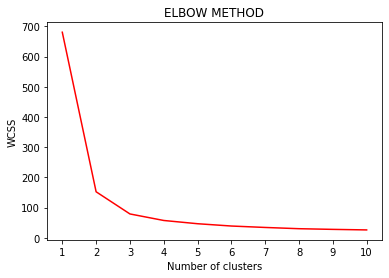

In [4]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,c='r')
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.xticks(range(1,11))
plt.show()

#### From the graph we can see 'the elbow' which is the point of optimum number of cluster. After this point, the WCSS does not decrease significantly after every increment in k.

#### Thus, we choose k as 3 for this dataset


### Step 5 --> Training the Model & Predicting Clusters for Given Dataset with k = 3

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Step 6 --> Visualizing the Clusters and their Centroids

#### We are only using the first 2 features in order to plot a 2D Graph

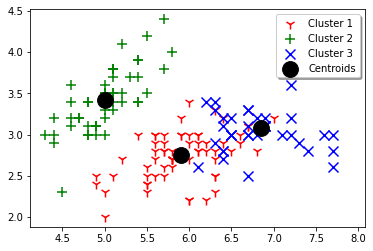

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            marker='1', s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            marker='+',s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], 
            marker='x',s = 100, c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 250, c = 'black', label = 'Centroids')

plt.legend(loc=1,shadow=True)

#### In the above graph, we can clearly see the data seperated into 3 distinct clusters.

### Bonus Step --> Predicting Cluster of New Input

In [7]:
x1 = [[4.4,2.9,1.4,0.2]]
x2 = [[7.3,2.9,6.3,1.8]]
x3 = [[5.0,3.4,1.6,0.4]]

print(kmeans.predict(x1),kmeans.predict(x2),kmeans.predict(x3))

[1] [2] [1]
